In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [51]:
# Read the audio file
sampling_freq, signal = wavfile.read('test_sound.wav')

C:\Users\serey\AppData\Local\Temp\ipykernel_15036\4244714036.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_freq, signal = wavfile.read('test_sound.wav')


In [65]:
# Display the params
print('\nSignal shape:', signal.shape)
print('Datatype:', signal.dtype)
print('Signal duration:', round(signal.shape[0] / float(sampling_freq), 2), 'seconds')

min_val = (signal.min())
max_val = (signal.max())


Signal shape: (50, 2)
Datatype: float64
Signal duration: 0.01 seconds
-0.009735107421875
0.00689697265625


In [53]:
# Normalize the signal
signal = signal / np.power(2, 15)

In [54]:
# Extract the first 50 values
signal = signal[:50]

In [55]:
# Construct the time axis in milliseconds
time_axis = 1000 * np.arange(0, len(signal), 1) / float(sampling_freq)

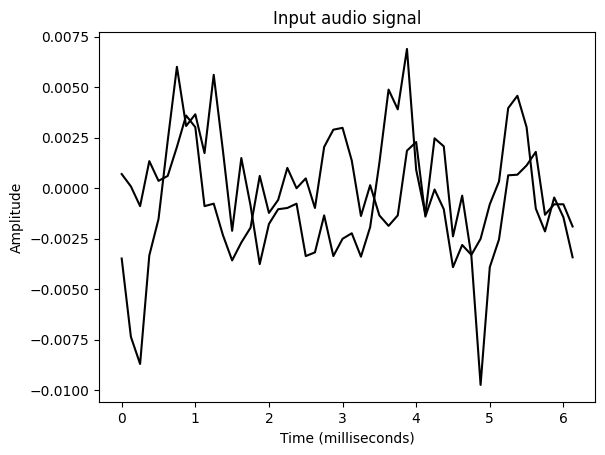

In [56]:
# Plot the audio signal
plt.plot(time_axis, signal, color='black')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.title('Input audio signal')
plt.show()


In [57]:
len_signal = len(signal)
len_half = np.ceil((len_signal + 1) / 2.0).astype(np.int_)
freq_signal = np.fft.fft(signal)

In [58]:
freq_signal = abs(freq_signal[0:len_half]) / len_signal
freq_signal **= 2
len_fts = len(freq_signal)

In [59]:
if len_signal % 2:
    freq_signal[1:len_fts] *= 2
else:
    freq_signal[1:len_fts-1] *= 2

In [60]:
signal_power = 10 * np.log10(freq_signal)
x_axis = np.arange(0, len_half, 1) * (sampling_freq / len_signal) / 10.0

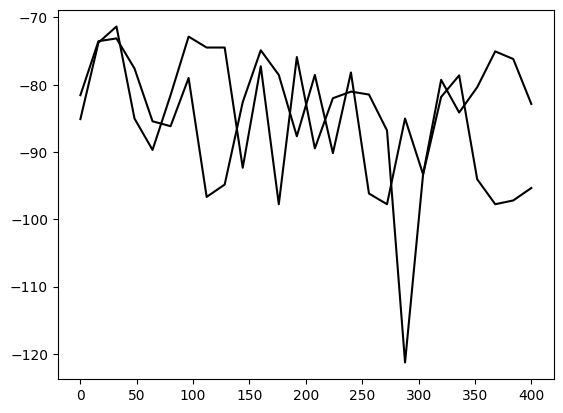

In [61]:
# Plot the audio signal
plt.plot(x_axis, signal_power, color='black')
plt.show()

In [80]:
duration = 30
t = np.linspace(min_val, max_val, duration * sampling_freq)
signal = np.sin(2 * np.pi * freq_signal[:,0].T * t[:,0])

ValueError: operands could not be broadcast together with shapes (26,) (240000,) 